# **Skytrax Review**

## First settings

In [2]:
# The following analysis belongs to mipapadi and it is an attempt to present some data analysis skills.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import csv
import os

In [5]:
# We get present working directory in order to have an independent notebook.
pwd = os.getcwd()

In [6]:
pd.set_option('display.max_rows', 200)

## Airline dataset preparation

In [7]:
airline_df = pd.read_csv(pwd + '\\airline.csv')

In [ ]:
# By exploring the datasset, we noticed that these columns have a lot of null values. So let's compare with the total number of rows.
airline_df[['aircraft', 'type_traveller', 'route', 'ground_service_rating', 'wifi_connectivity_rating']].isnull().sum()

In [9]:
# We clean a little bit the dataset. We remove some columns we don't need and those that have almost 97.5% of their records, empty(/NaN). 
airline_df.drop(columns=['link', 'title', 'content', 'aircraft', 'type_traveller', 'route', 'ground_service_rating', 'wifi_connectivity_rating'], inplace=True)

In [10]:
airline_df.rename(columns={'airline_name' : 'airline'}, inplace=True)

In [11]:
# We keep only the ratings on a new data frame.
# Now we remove all rows, that have values for less than 6 columns.
rating_df = airline_df.drop(columns=['author', 'author_country', 'date'])
rating_df.dropna(thresh=6, inplace=True)

In [12]:
rating_df.sort_values('airline', ascending=True, inplace=True)
rating_df.reset_index(inplace=True)
rating_df.drop(columns=['index'], inplace=True)

In [13]:
# With this way we managed to have a complete and balanaced dataset, ready for analysis.
rating_df.fillna(method='bfill', inplace=True)

In [ ]:
# Indeed. No null values
rating_df.isnull().sum()

In [15]:
# We noticed that the overall_rating is not representative, so create a total_rating depending on the other scores.
# There is for example a record that has everywhere fives, but it's overall_rating is ten. Unreal...
rating_df['total_rating'] = rating_df.iloc[:,3:8].mean(axis=1)
rating_df['total_rating'] = rating_df['total_rating'].round()

In [16]:
def status(avg):
    if avg <= 2: return "Low"
    elif avg >= 5: return "High"
    else: return "Medium"

In [17]:
# We have the status of airline, depending on the total_rating
rating_df['airline_status'] = rating_df['total_rating'].apply(status)

## Aegean Airlines general conclusions

In [18]:
aegean_df = rating_df.iloc[17:214].copy()

Text(0.55, 1.5, 'What people believe about the value of Aegean Airlines')

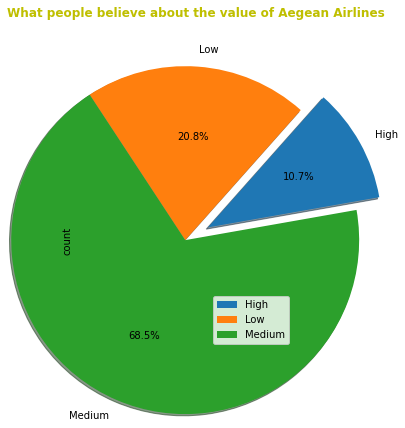

In [19]:
%matplotlib inline

# What people believe about the value of aegean airlines company
expl = (0.3, 0, 0)
aegean_df.groupby('airline_status')['total_rating'].agg(['count']).plot.pie(autopct='%1.1f%%', radius=2, startangle=10, explode=expl, shadow=True, subplots=True)

# Fix the legend
plt.legend(loc='lower right')
# plt.gca().get_legend().remove()

# Fix the title
plt.title('What people believe about the value of Aegean Airlines', color='y', fontweight='bold', x=0.55, y=1.5)

In [20]:
t1 = rating_df.loc[rating_df['airline'] == 'aegean-airlines']
t2 = rating_df.loc[rating_df['airline'] == 'wizz-air']
tmp_df = pd.concat([t1,t2], ignore_index=True)

C:\Users\Mixalis\AppData\Local\Temp/ipykernel_6932/2584946773.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmp_df.groupby('airline')['seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating', 'inflight_entertainment_rating', 'value_money_rating', 'total_rating'].agg(['mean']).plot.bar(rot=1, title='Compare Mean Ratings')


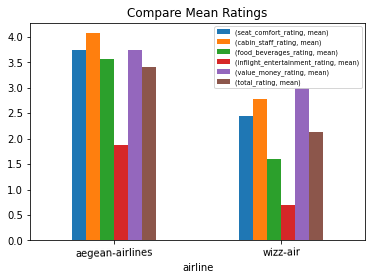

In [21]:
%matplotlib inline

# Comparison with wizz air 
tmp_df.groupby('airline')['seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating', 'inflight_entertainment_rating', 'value_money_rating', 'total_rating'].agg(['mean']).plot.bar(rot=1, title='Compare Mean Ratings')

# Fix the legend
plt.legend(loc='upper right', prop={'size': 6.5})

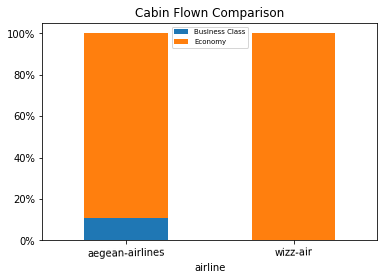

In [22]:
%matplotlib inline

# Record count grouped by airline and cabin_flown with normalized columns so that each one sums up to 100%
tmp_df.groupby(['airline','cabin_flown']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', title='Cabin Flown Comparison', rot=1, stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Fix the legend
plt.legend(loc='upper center', prop={'size': 7})

In [23]:
sns.set_theme(style="darkgrid")

Text(0.5, 1.0, 'Seat Comfortability Comparison')

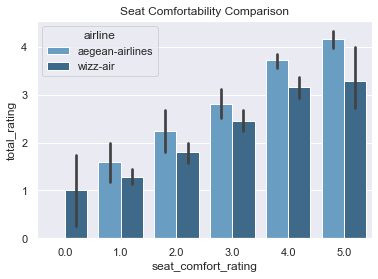

In [24]:
# Here we have a comparison with wizz-air to understand what people think about the comfortability of seats along with total rating
sns.barplot(x='seat_comfort_rating', y='total_rating', data=tmp_df, hue='airline', palette="Blues_d", saturation=0.8).set_title('Seat Comfortability Comparison')

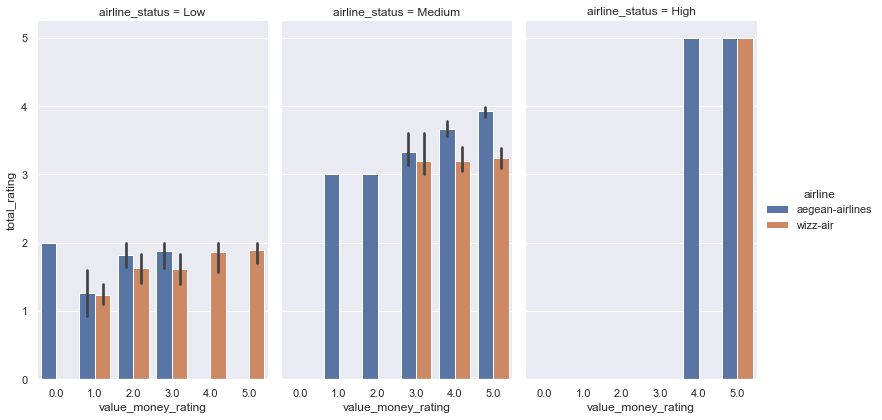

In [25]:
# We see some results for the vfm rating over our total rating, grouped by status
cp = sns.catplot(x='value_money_rating', y='total_rating', hue='airline', col='airline_status', data=tmp_df, kind='bar', height=6, aspect=.6)

## Seat dataset preparation  

In [26]:
seat_df = pd.read_csv(pwd + '\\seat.csv')

In [ ]:
# We noticed that some columns have a lot of null values. So let's compare with the total number of rows.
seat_df[['aircraft', 'seat_layout', 'date_flown', 'cabin_flown', 'type_traveller', 'overall_rating', 'seat_legroom_rating', 'seat_recline_rating', 'seat_width_rating', 'aisle_space_rating', 'viewing_tv_rating', 'power_supply_rating', 'seat_storage_rating', 'recommended']].isnull().sum()

In [28]:
# We clean a little bit the dataset. We remove some columns we don't need and those that have almost 91% of their records, empty(/NaN). 
seat_df.drop(columns=['link', 'title', 'author', 'author_country', 'date', 'content', 'seat_layout', 'date_flown', 'type_traveller', 'power_supply_rating', 'seat_storage_rating'], inplace=True)

In [29]:
seat_df.rename(columns={'airline_name' : 'airline'}, inplace=True)

In [30]:
# Now we remove all rows, that have values for less than 8 columns.
seat_df.dropna(thresh=8, inplace=True)

In [31]:
# With this way we managed to have a complete and balanaced dataset, ready for analysis.
seat_df.fillna(method='bfill', inplace=True)

In [32]:
seat_df.sort_values('airline', ascending=True, inplace=True)
seat_df.reset_index(inplace=True)
seat_df.drop(columns=['index'], inplace=True)

In [ ]:
# Indeed. No null values
seat_df.isnull().sum()

In [34]:
# We noticed that the overall_rating is not representative, so create a (seat)total_rating depending on the other scores.
# There is for example a record that has everywhere fours, but it's overall_rating is ten. Unreal...
seat_df['total_rating'] = seat_df.iloc[:,4:-1].mean(axis=1)
seat_df['total_rating'] = seat_df['total_rating'].round()

In [36]:
t3 = seat_df.loc[seat_df['airline'] == 'aegean-airlines']
t4 = seat_df.loc[seat_df['airline'] == 'virgin-australia']
tmp2_df = pd.concat([t3,t4], ignore_index=True)

In [37]:
t5 = rating_df.loc[rating_df['airline'] == 'aegean-airlines']
t6 = rating_df.loc[rating_df['airline'] == 'virgin-australia']
tmp3_df = pd.concat([t5,t6], ignore_index=True)

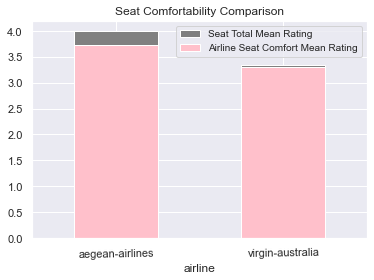

In [38]:
ax = plt.gca()

tmp2_df.groupby('airline')['total_rating'].agg(['mean']).plot.bar(rot=1, color='grey', ax=ax)
tmp3_df.groupby('airline')['seat_comfort_rating'].agg(['mean']).plot.bar(rot=1, color='pink', ax=ax, title='Seat Comfortability Comparison')

# Fix the legend
leg = plt.legend(loc='upper right', prop={'size': 10})
leg.get_texts()[0].set_text('Seat Total Mean Rating')
leg.get_texts()[1].set_text('Airline Seat Comfort Mean Rating')

In [40]:
# Here we can see every single rating for every class 
fig = px.bar(tmp3_df, x='airline', y='overall_rating', color='cabin_flown', barmode='group', title='Overall Ratings For Every Class NO.1')
fig.show()

In [41]:
# Here we can see how many people rate for every class
fig = px.histogram(tmp3_df, x='airline', y='overall_rating', color='cabin_flown', barmode='group', histfunc='count', title='Overall Ratings For Every Class NO.2')
fig.show()

In [42]:
# Here we can see the average rating of every class
fig = px.histogram(tmp3_df, x='airline', y='overall_rating', color='cabin_flown', barmode='group', histfunc='avg', title='Overall Ratings For Every Class NO.3')
fig.show()

## Thanks

 At this point i am going to thank you for your pattience, reading the whole notebook. 
 I hope you enjoyed it.

Copyright © 2022 mipapadi.